In [18]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Extract dataset
zip_path = "/content/brain-tumor-mri-dataset.zip"

dataset_path = 'brain_tumor_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

# Dataset directories
data_dir = os.path.join(dataset_path, 'Brain Tumor MRI Dataset')

In [19]:
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")

Directory: brain_tumor_dataset
Directory: brain_tumor_dataset/brain-tumor-mri-dataset
Directory: brain_tumor_dataset/brain-tumor-mri-dataset/Testing
Directory: brain_tumor_dataset/brain-tumor-mri-dataset/Testing/pituitary
  File: Te-pi_0269.jpg
  File: Te-pi_0270.jpg
  File: Te-pi_0272.jpg
  File: Te-pi_0271.jpg
  File: Te-pi_0273.jpg
  File: Te-pi_0274.jpg
Directory: brain_tumor_dataset/brain-tumor-mri-dataset/Testing/meningioma
  File: Te-me_0290.jpg
  File: Te-me_0292.jpg
  File: Te-me_0293.jpg
  File: Te-me_0291.jpg
  File: Te-me_0289.jpg
  File: Te-me_0288.jpg
Directory: brain_tumor_dataset/brain-tumor-mri-dataset/Testing/glioma
  File: Te-gl_0264.jpg
  File: Te-gl_0265.jpg
  File: Te-gl_0268.jpg
  File: Te-gl_0266.jpg
  File: Te-gl_0267.jpg
Directory: brain_tumor_dataset/brain-tumor-mri-dataset/Testing/notumor
  File: Te-no_0363.jpg
  File: Te-no_0365.jpg
  File: Te-no_0362.jpg
  File: Te-no_0364.jpg
  File: Te-no_0361.jpg
  File: Te-no_0360.jpg
Directory: brain_tumor_dataset/bra

In [20]:
data_dir = os.path.join(dataset_path, 'brain-tumor-mri-dataset', 'Training')

In [21]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = data_gen.flow_from_directory(
    data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='training')
val_gen = data_gen.flow_from_directory(
    data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', subset='validation')

Found 18 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [22]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1667 - loss: 1.3920 - val_accuracy: 0.2500 - val_loss: 1.2322
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - accuracy: 0.3333 - loss: 1.1735 - val_accuracy: 0.7500 - val_loss: 1.0482
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step - accuracy: 0.6111 - loss: 0.8685 - val_accuracy: 0.5000 - val_loss: 1.1268
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - accuracy: 0.8889 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.8873
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - accuracy: 0.7778 - loss: 0.5329 - val_accuracy: 0.5000 - val_loss: 0.9391
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 0.6111 - loss: 0.9524 - val_accuracy: 0.7500 - val_loss: 0.9539
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8889 - loss: 0.4241 - val_accuracy: 0.5000 - val_loss: 1.1494
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1553 - val_accuracy: 0.5000 - val_loss: 1.4591
Epoch 9/10
1

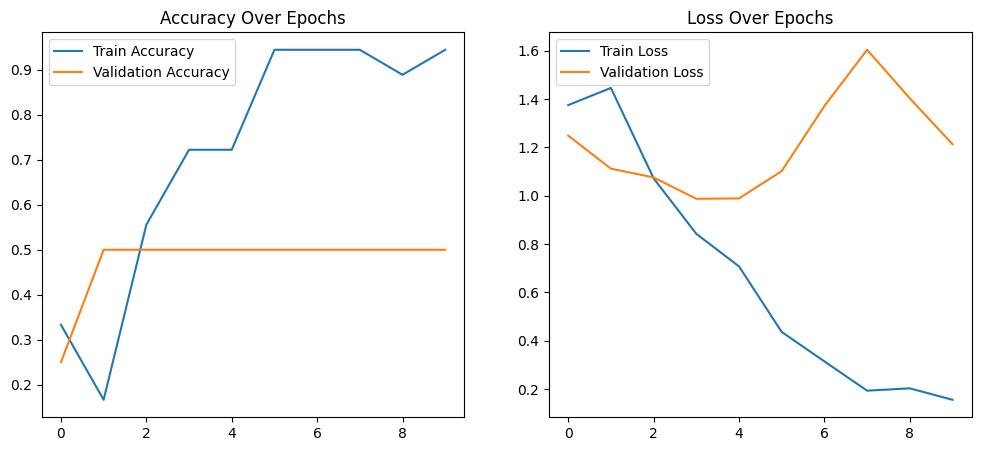

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

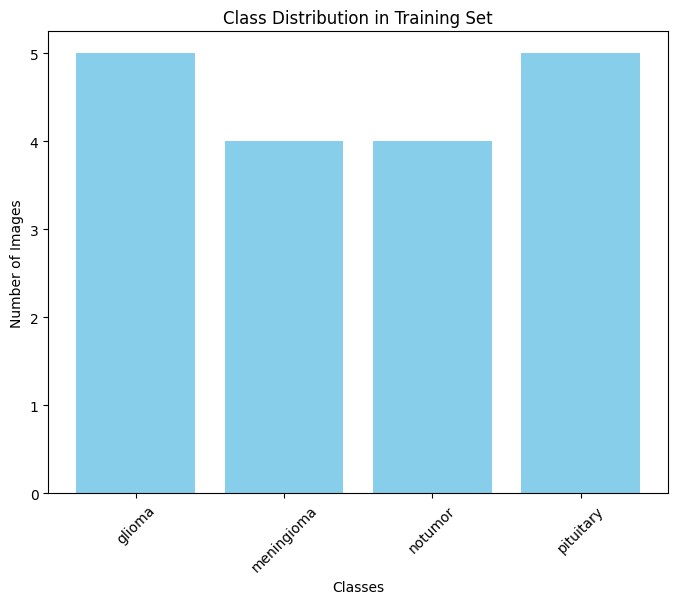

In [10]:
plt.figure(figsize=(8, 6))
labels, counts = np.unique(train_gen.classes, return_counts=True)
plt.bar(train_gen.class_indices.keys(), counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


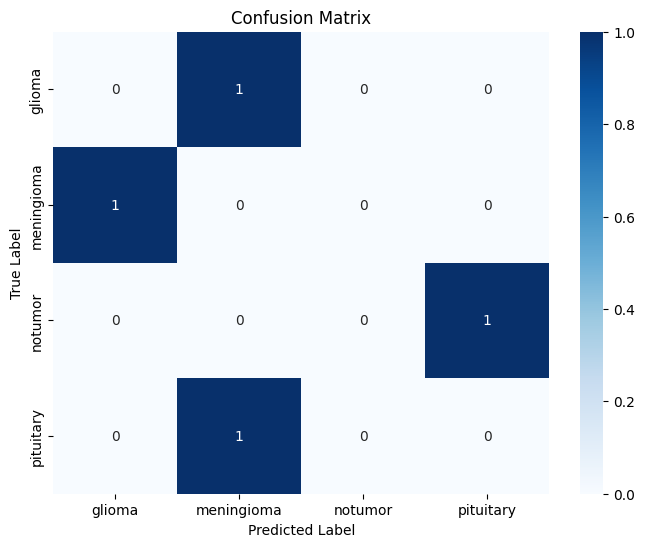

In [11]:
def plot_confusion_matrix(model, generator):
    from sklearn.metrics import confusion_matrix
    import itertools

    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=generator.class_indices.keys(), yticklabels=generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, val_gen)

In [12]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.2f}")
print(f"Final Validation Accuracy: {val_accuracy:.2f}")

Final Training Accuracy: 0.94
Final Validation Accuracy: 0.50


In [14]:
model.save('brain_tumor_cnn.h5')

In [15]:
import pandas as pd

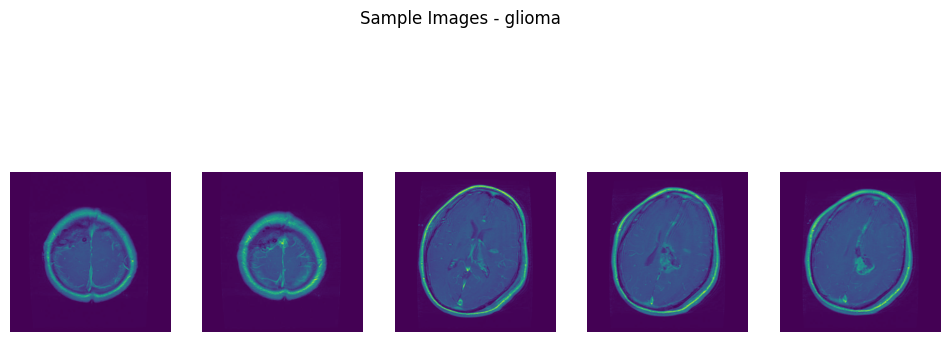

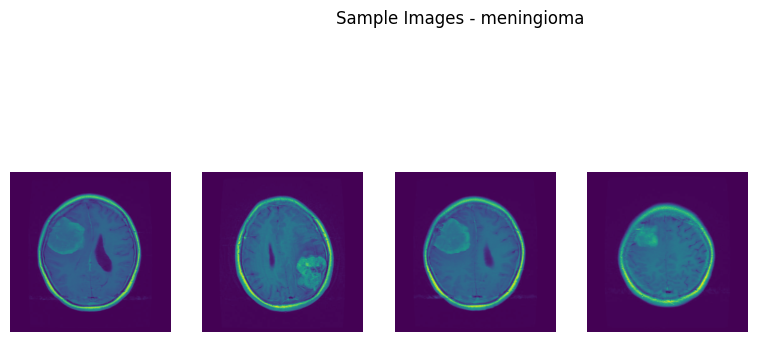

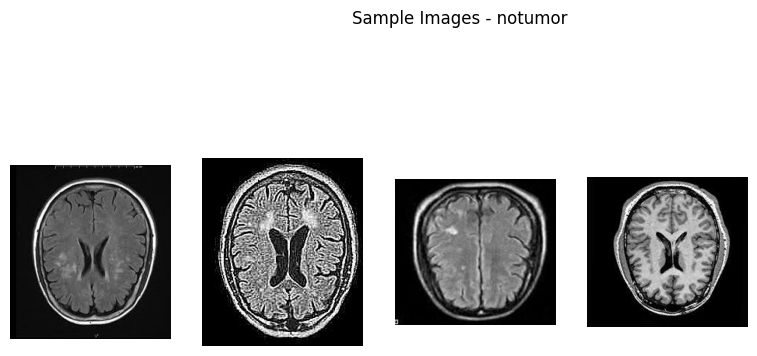

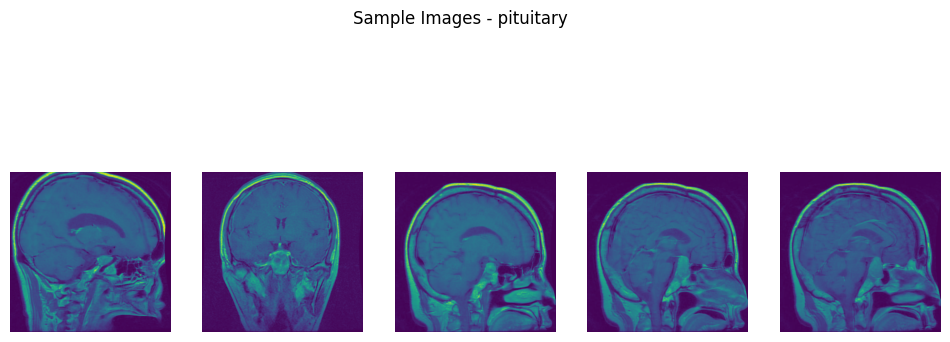

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


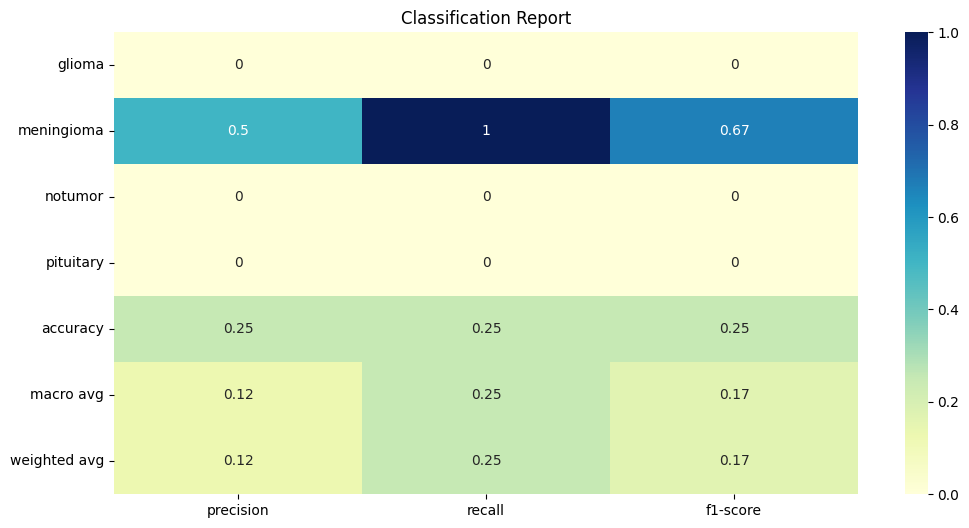

In [16]:
def plot_sample_images(generator, classes, n_samples=5):
    for cls in classes:
        plt.figure(figsize=(12, 5))
        cls_images = [img for img, label in zip(generator.filepaths, generator.classes) if label == cls][:n_samples]
        for i, img_path in enumerate(cls_images):
            plt.subplot(1, n_samples, i + 1)
            img = plt.imread(img_path)
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(f'Sample Images - {list(generator.class_indices.keys())[cls]}')
        plt.show()

plot_sample_images(train_gen, classes=np.unique(train_gen.classes))

from sklearn.metrics import classification_report

def plot_classification_report(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)
    report = classification_report(y_true, y_pred, target_names=generator.class_indices.keys(), output_dict=True)

    plt.figure(figsize=(12, 6))
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
    plt.title("Classification Report")
    plt.show()

plot_classification_report(model, val_gen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


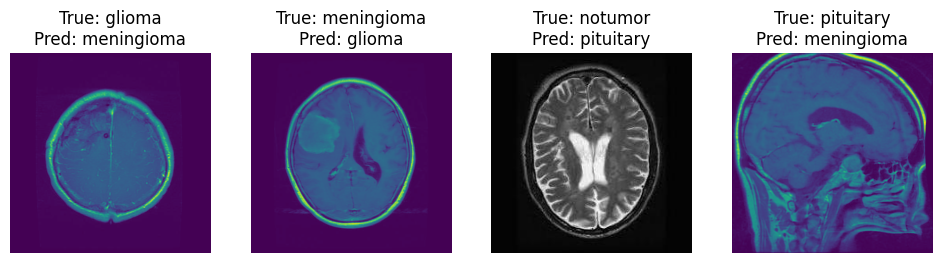

In [17]:

def show_misclassified_images(model, generator, n_samples=5):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=1)
    misclassified_indices = np.where(y_true != y_pred)[0]

    plt.figure(figsize=(15, 7))
    for i, idx in enumerate(misclassified_indices[:n_samples]):
        img_path = generator.filepaths[idx]
        true_label = list(generator.class_indices.keys())[y_true[idx]]
        pred_label = list(generator.class_indices.keys())[y_pred[idx]]

        img = plt.imread(img_path)
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(img)
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.show()

show_misclassified_images(model, val_gen)
